In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [28]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
y_train.shape

(60000,)

In [34]:
Augment = ImageDataGenerator(shear_range=0.2,
                             zoom_range=0.2,
                             fill_mode='constant',
                            cval=0)

In [38]:
Augmented_Data=[]
for i in range (len(x_train)):
    Augmented = Augment.flow(x_train[i].reshape(-1, 28, 28, 1))
    Augmented_Data.append(Augmented)

In [42]:
len(Augmented_Data)

60000

In [4]:
# # Flatten the images for the Single Layer Perceptron
# x_train_flat = x_train.reshape(len(x_train), 28*28)
# x_test_flat = x_test.reshape((x_test.shape[0], -1))

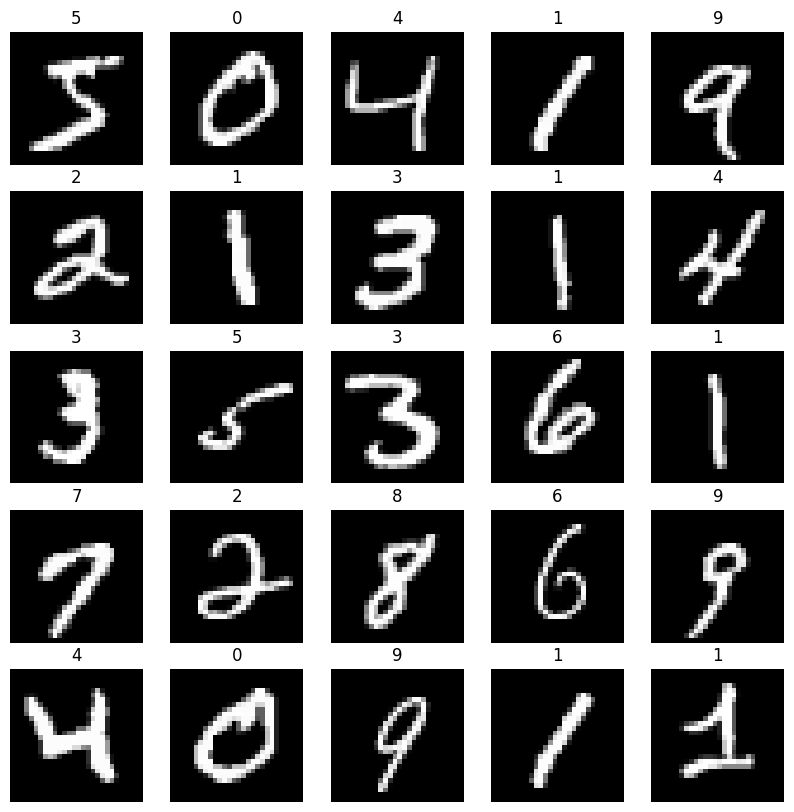

In [5]:
# Display some images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [19]:
# Build the Single Layer Perceptron model
model = tf.keras.Sequential(
    [
    # Flatten layer to convert 28x28 images into a flat vector
    tf.keras.layers.Flatten(input_shape=(28, 28)),
        
    # First Dense layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Second Dense layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),

    # third Dense layer with 32 neurons and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),

    
    # Output layer with 10 neurons (for 10 classes) and sigmoid activation
    tf.keras.layers.Dense(10, activation='sigmoid')  
    ])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2519 - accuracy: 0.9250
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1055 - accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0755 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0583 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0484 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0376 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0351 - accuracy: 0.9885
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0287 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1072

In [32]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc * 100:.2f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.9754

Test accuracy: 97.54


313/313 [==============================] - 1s 2ms/step


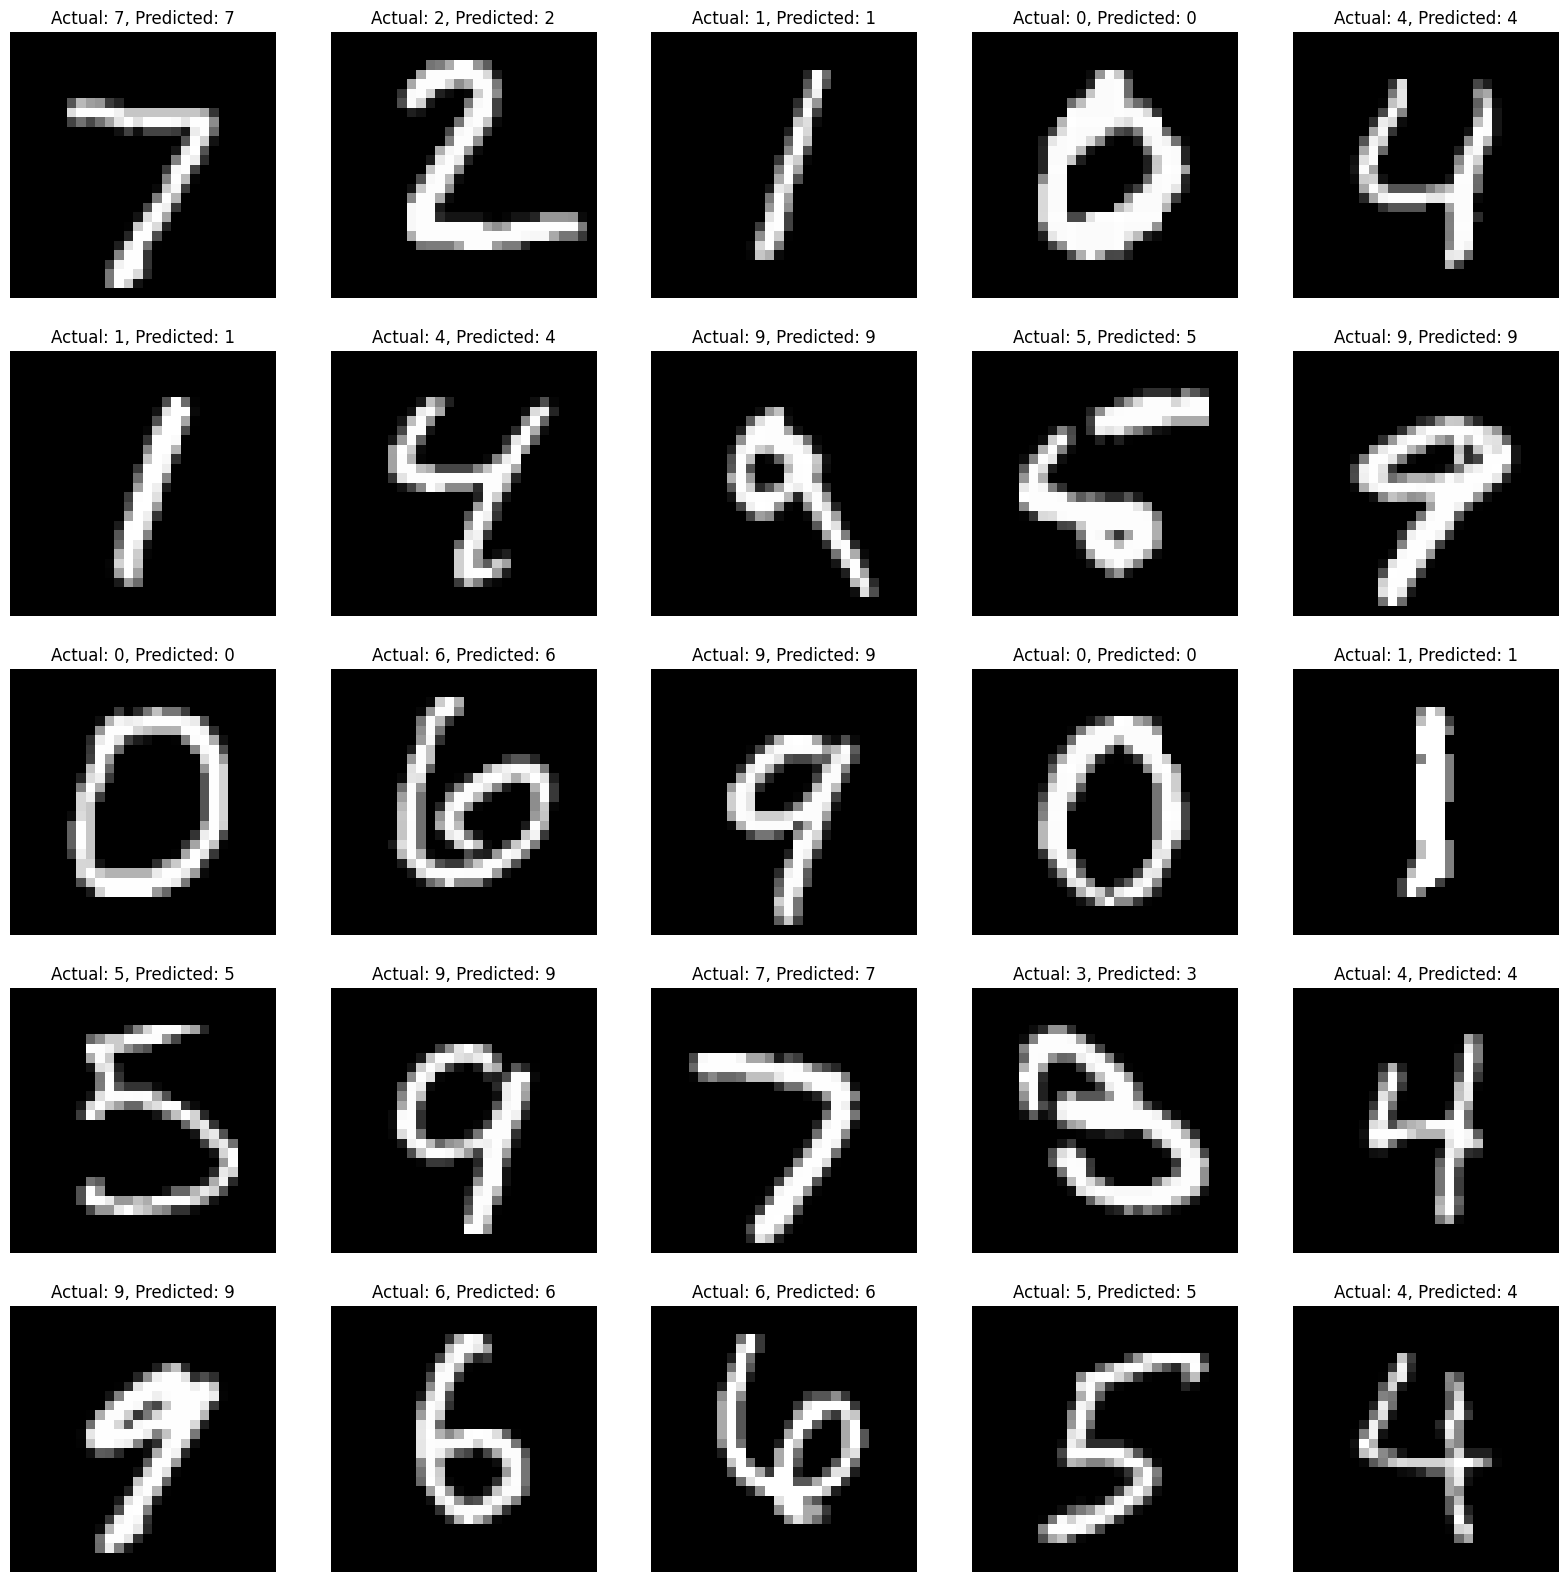

In [15]:
# Predictions
predictions = model.predict(x_test)

# Visualize some predictions
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Actual: {y_test[i]}, Predicted: {tf.argmax(predictions[i])}')
    plt.axis('off')
plt.show()

# Thanks !